In [1]:
library(phytools)
library(paleotree)
library(caper)
library(bestNormalize)

Loading required package: ape

Loading required package: maps

Loading required package: MASS

Loading required package: mvtnorm


Attaching package: ‘bestNormalize’


The following object is masked from ‘package:MASS’:

    boxcox




In [2]:
t <- read.tree("silva.nwk")
# dropping zero-length terminal branches and collapse internal zero-length branches
nt <- di2multi(dropZLB(t))
df <- read.csv("ensembl34.csv")
tip <- as.data.frame(nt$tip.label)
names(tip) <- 'genome'
# creating new table
d <- merge(df, tip, by='genome')

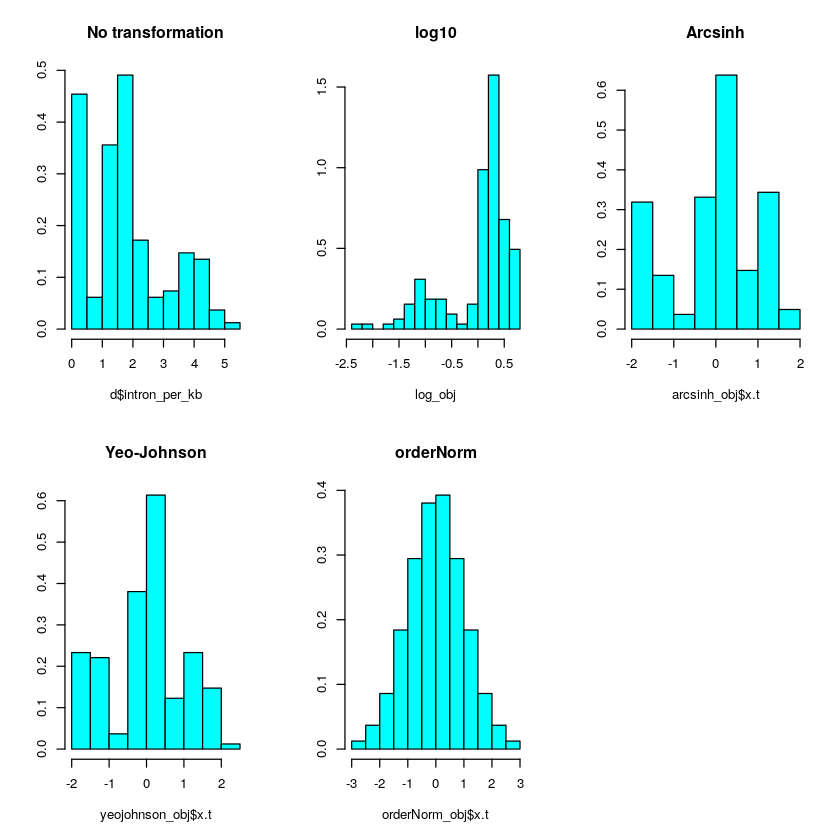

In [3]:
# trying different transformations
# intron_per_kb
log_obj <- log10(d$intron_per_kb)
arcsinh_obj <- arcsinh_x(d$intron_per_kb)
# boxcox_obj <- boxcox(d$intron_per_kb)
yeojohnson_obj <- yeojohnson(d$intron_per_kb)
orderNorm_obj <- orderNorm(d$intron_per_kb)
par(mfrow = c(2,3))
MASS::truehist(d$intron_per_kb, main = "No transformation", nbins = 12)
MASS::truehist(log_obj, main = "log10", nbins = 12)
MASS::truehist(arcsinh_obj$x.t, main = "Arcsinh", nbins = 12)
# MASS::truehist(boxcox_obj$x.t, main = "Box Cox", nbins = 12)
MASS::truehist(yeojohnson_obj$x.t, main = "Yeo-Johnson", nbins = 12)
MASS::truehist(orderNorm_obj$x.t, main = "orderNorm", nbins = 12)

Warning message in optimize(yj_loglik, lower = lower, upper = upper, maximum = TRUE, :
“NA/Inf replaced by maximum positive value”


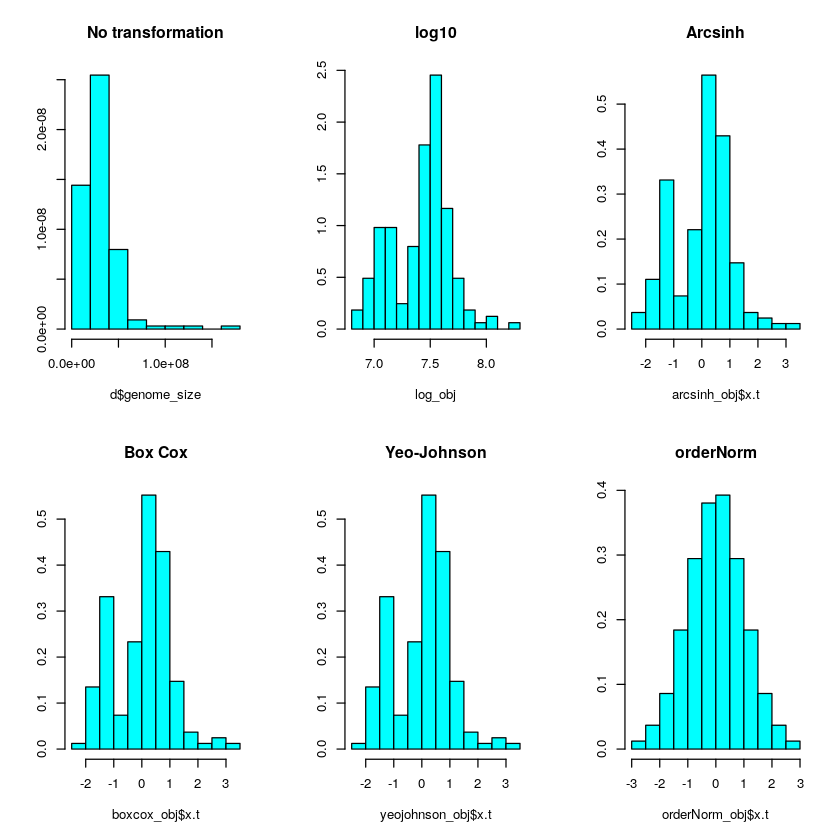

In [4]:
# genome_size
log_obj <- log10(d$genome_size)
arcsinh_obj <- arcsinh_x(d$genome_size)
boxcox_obj <- boxcox(d$genome_size)
yeojohnson_obj <- yeojohnson(d$genome_size)
orderNorm_obj <- orderNorm(d$genome_size)
par(mfrow = c(2,3))
MASS::truehist(d$genome_size, main = "No transformation", nbins = 12)
MASS::truehist(log_obj, main = "log10", nbins = 12)
MASS::truehist(arcsinh_obj$x.t, main = "Arcsinh", nbins = 12)
MASS::truehist(boxcox_obj$x.t, main = "Box Cox", nbins = 12)
MASS::truehist(yeojohnson_obj$x.t, main = "Yeo-Johnson", nbins = 12)
MASS::truehist(orderNorm_obj$x.t, main = "orderNorm", nbins = 12)

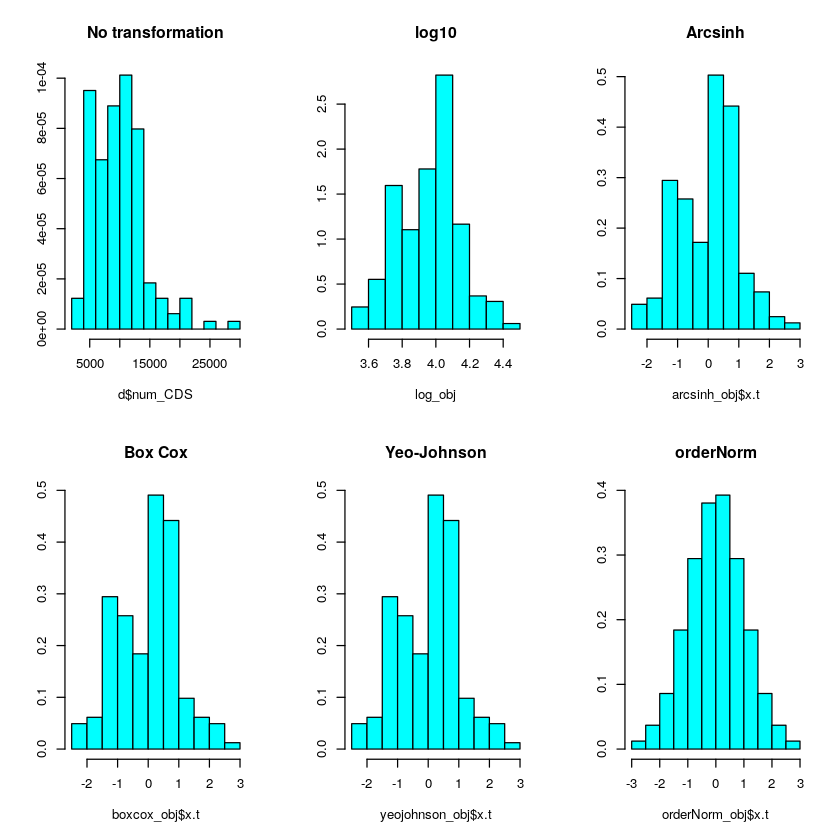

In [5]:
# num_CDS
log_obj <- log10(d$num_CDS)
arcsinh_obj <- arcsinh_x(d$num_CDS)
boxcox_obj <- boxcox(d$num_CDS)
yeojohnson_obj <- yeojohnson(d$num_CDS)
orderNorm_obj <- orderNorm(d$num_CDS)
par(mfrow = c(2,3))
MASS::truehist(d$num_CDS, main = "No transformation", nbins = 12)
MASS::truehist(log_obj, main = "log10", nbins = 12)
MASS::truehist(arcsinh_obj$x.t, main = "Arcsinh", nbins = 12)
MASS::truehist(boxcox_obj$x.t, main = "Box Cox", nbins = 12)
MASS::truehist(yeojohnson_obj$x.t, main = "Yeo-Johnson", nbins = 12)
MASS::truehist(orderNorm_obj$x.t, main = "orderNorm", nbins = 12)

In [6]:
# orderNorm Transformation
d$on_genome_size <- (orderNorm(d$genome_size))$x.t
d$on_intron_per_kb <- (orderNorm(d$intron_per_kb))$x.t
d$on_num_CDS <- (orderNorm(d$num_CDS))$x.t

Warning message in caic.diagnostics(crunchMod, outlier = 1):
“Plots of absolute contrasts against node ages requested where node ages are not available.
  The tree may not be ultrametric, or the tolerance may need to be adjusted.”



Excluding 4 contrasts with absolute studentised residuals > 3

on_intron_per_kb :
    Estimate Std. Error t value  Pr(>|t|)    
NV  0.092357   0.201192  0.4590 0.6469372    
SD -5.825340   1.684778 -3.4576 0.0007293 ***

on_num_CDS :
    Estimate Std. Error t value Pr(>|t|)
NV  0.029675   0.449904  0.0660   0.9475
SD -1.676424   3.780292 -0.4435   0.6581

---
Signif. codes: 0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

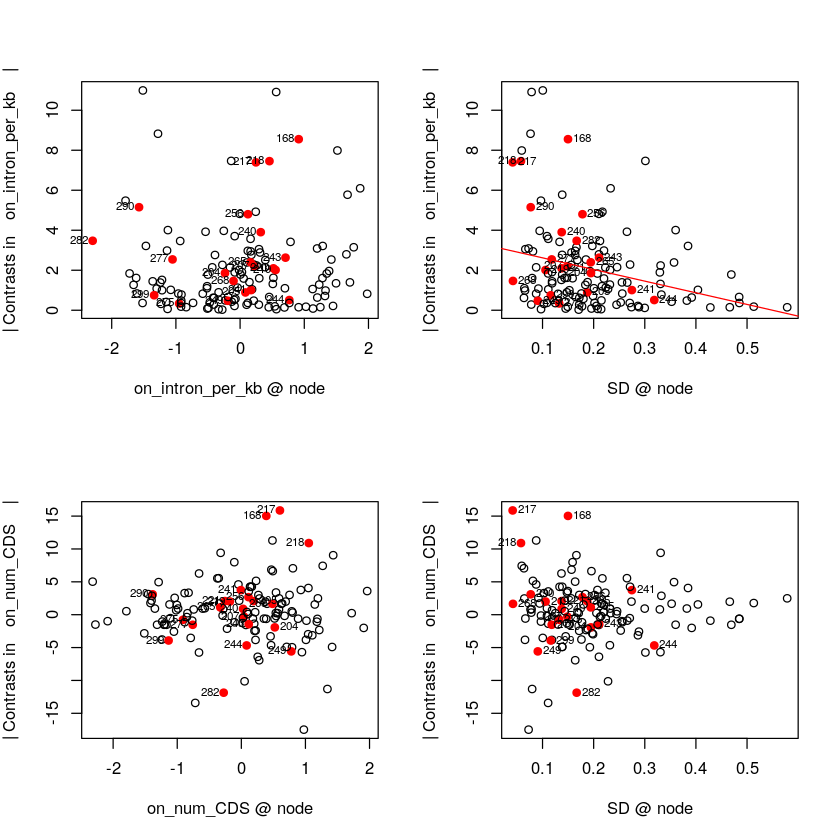

In [7]:
# phylogenetic independent contrasts
intron <- comparative.data(nt, d, genome)
fit3 <- crunch(on_genome_size ~ on_intron_per_kb + on_num_CDS, data=intron)
crunchMod <- caic.robust(fit3)
par(mfrow=c(2,2))
caic.diagnostics(crunchMod, outlier=1)
# a significant relationship between absolute values of standardized contrasts 
# and the estimated standard deviation was obtained

Warning message in caic.diagnostics(crunchMod):
“Plots of absolute contrasts against node ages requested where node ages are not available.
  The tree may not be ultrametric, or the tolerance may need to be adjusted.”



Excluding 25 contrasts with absolute studentised residuals > 1

on_intron_per_kb :
    Estimate Std. Error t value Pr(>|t|)   
NV  0.059739   0.207277  0.2882 0.773712   
SD -4.727660   1.733945 -2.7265 0.007412 **

on_num_CDS :
   Estimate Std. Error t value Pr(>|t|)
NV -0.23628    0.42892 -0.5509   0.5828
SD  1.25472    3.67784  0.3412   0.7336

---
Signif. codes: 0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

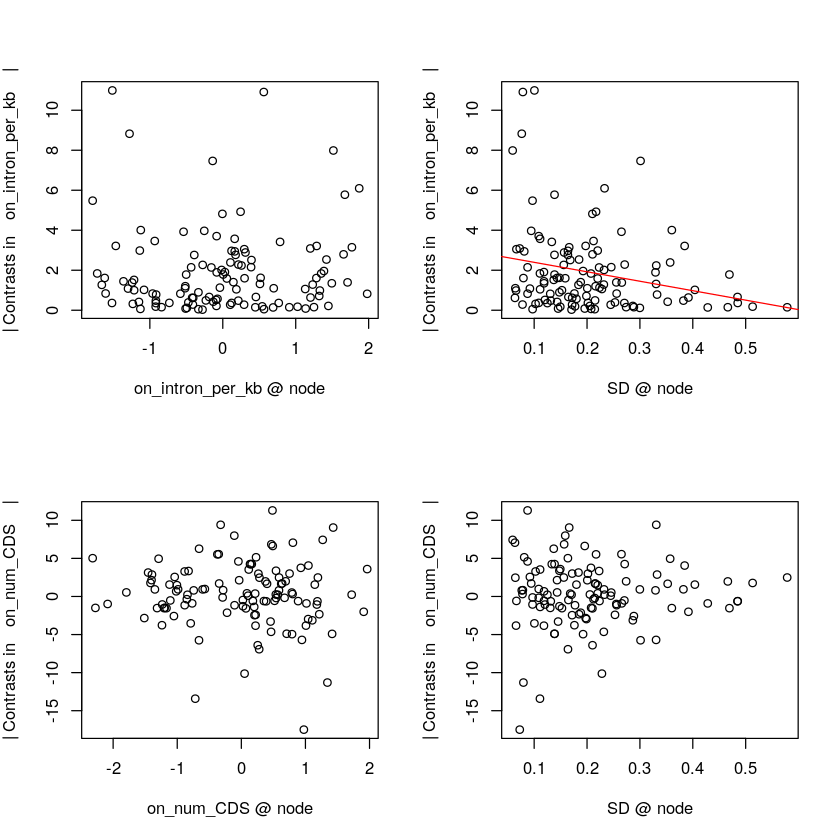

In [8]:
par(mfrow=c(2,2))
crunchMod <- caic.robust(fit3, robust=1)
caic.diagnostics(crunchMod)
# removing outliers (the above red points) using a threshold of 1 
# for the absolute studentised residuals

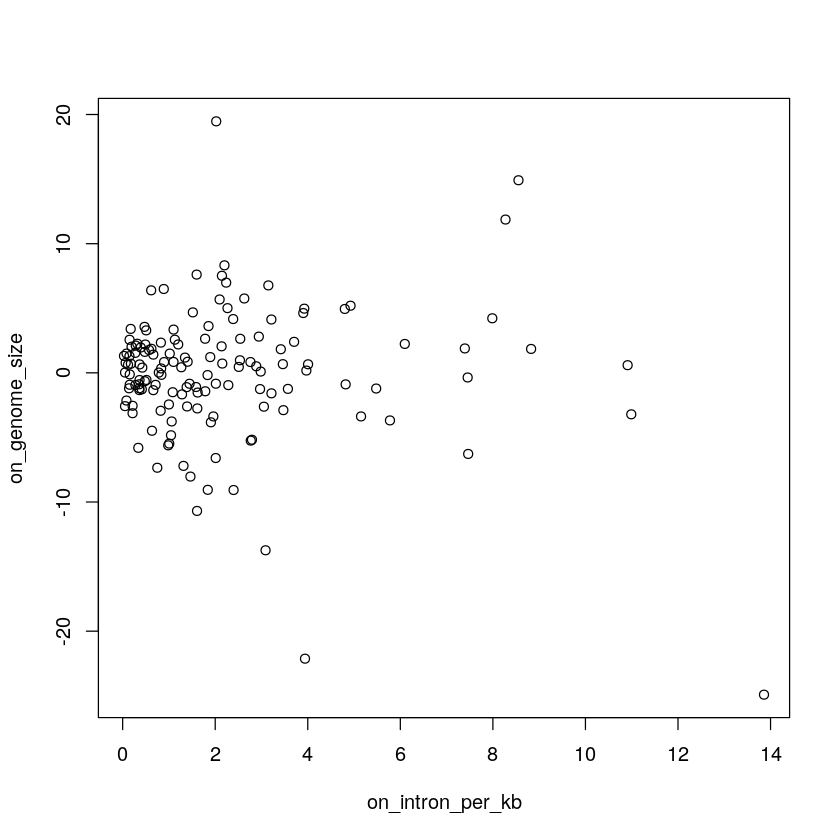

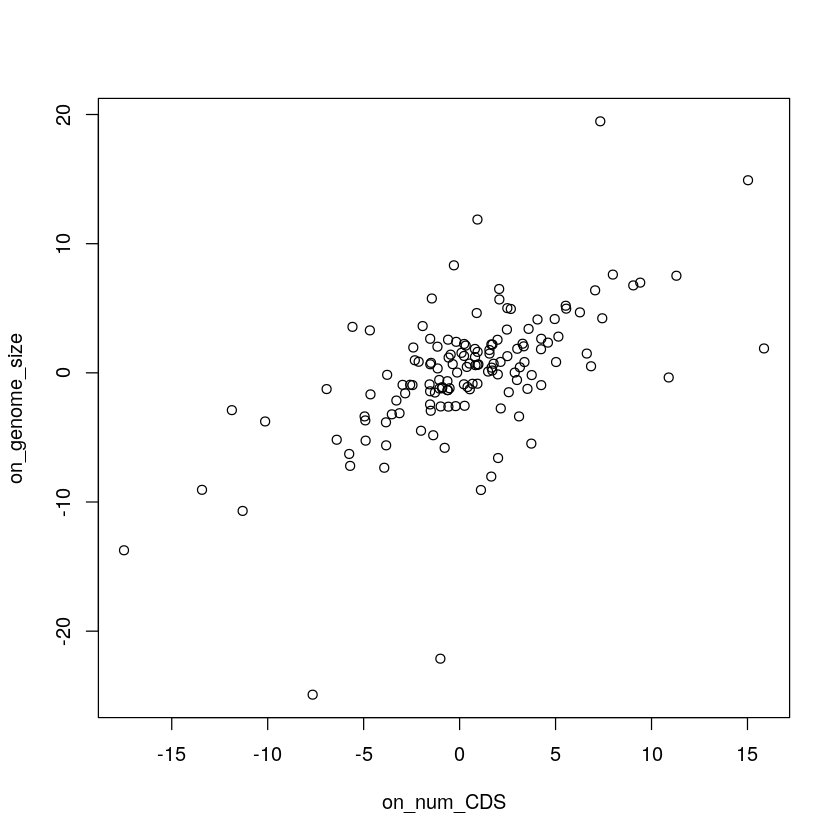

In [9]:
par(mfrow=c(1,1))
crunchTab <- caic.table(crunchMod)
plot(on_genome_size ~ on_intron_per_kb + on_num_CDS, crunchTab)

In [10]:
pdf("contrast.pdf", width = 3.5, height = 4)
par(mfrow=c(1,1))
crunchTab <- caic.table(crunchMod)
plot(on_genome_size ~ on_intron_per_kb + on_num_CDS, crunchTab)
dev.off()

png 
  2

In [11]:
summary(crunchMod)


Call:
lm(on_genome_size ~ on_intron_per_kb + on_num_CDS - 1, data = contrData)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0954 -1.3062 -0.0727  1.1038  3.5831 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
on_intron_per_kb -0.05189    0.05962   -0.87    0.386    
on_num_CDS        0.66365    0.03916   16.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.804 on 114 degrees of freedom
Multiple R-squared:  0.7159,	Adjusted R-squared:  0.711 
F-statistic: 143.7 on 2 and 114 DF,  p-value: < 2.2e-16


In [12]:
# correlation tests for contrasts
cor.test(crunchTab$on_genome_size, crunchTab$on_intron_per_kb, method='spearman')
cor.test(crunchTab$on_genome_size, crunchTab$on_num_CDS, method='spearman')


	Spearman's rank correlation rho

data:  crunchTab$on_genome_size and crunchTab$on_intron_per_kb
S = 442300, p-value = 0.5301
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.05325999 



	Spearman's rank correlation rho

data:  crunchTab$on_genome_size and crunchTab$on_num_CDS
S = 196900, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.5785308 


In [13]:
# correlation tests for the original data
cor.test(d$on_genome_size, d$on_intron_per_kb, method='spearman')
cor.test(d$on_genome_size, d$on_num_CDS, method='spearman')


	Spearman's rank correlation rho

data:  d$on_genome_size and d$on_intron_per_kb
S = 323920, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.5512134 



	Spearman's rank correlation rho

data:  d$on_genome_size and d$on_num_CDS
S = 118160, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.8362955 


In [14]:
sessionInfo()

R version 3.4.4 (2018-03-15)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.4 LTS

Matrix products: default
BLAS: /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.7.1
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.7.1

locale:
 [1] LC_CTYPE=en_NZ.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_NZ.UTF-8        LC_COLLATE=en_NZ.UTF-8    
 [5] LC_MONETARY=en_NZ.UTF-8    LC_MESSAGES=en_NZ.UTF-8   
 [7] LC_PAPER=en_NZ.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_NZ.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] bestNormalize_1.4.3 caper_1.0.1         mvtnorm_1.0-8      
[4] MASS_7.3-49         paleotree_3.3.25    phytools_0.7-20    
[7] maps_3.3.0          ape_5.3            

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.4              pillar_1.4.3            c